# Team Members:
### Youssef Hassanien
### Shehab Tarek
### Ahmed Mohamed Taha
### Omar Khaled
### Mohamed Hazem

## Raw MxN Matrix

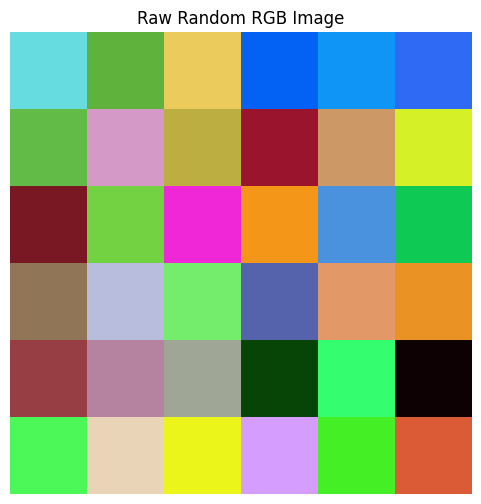

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Generate a random matrix M × N of values 0-255
M, N = 6, 6  # Define dimensions
raw_image = np.random.randint(0, 256, size=(M, N, 3), dtype=np.uint8)

# Visualize the raw random image
plt.figure(figsize=(6, 6))
plt.imshow(raw_image)
plt.title('Raw Random RGB Image')
plt.axis('off')
plt.show()

## Display pixel values

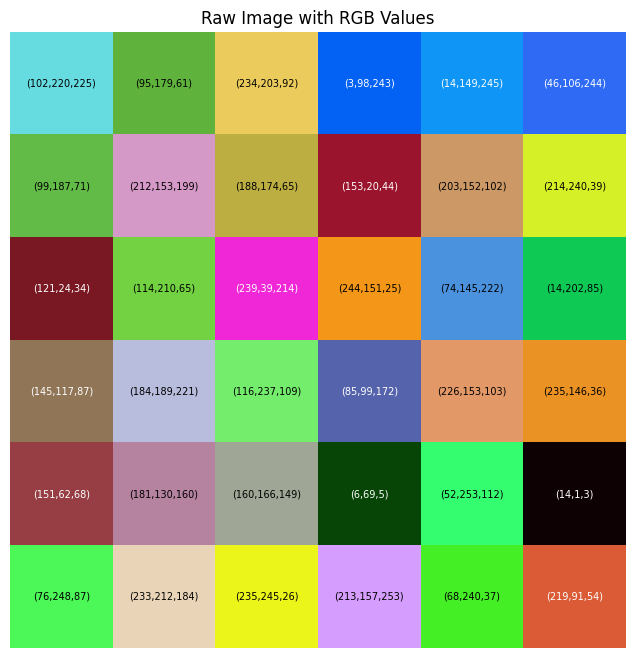

In [15]:
plt.figure(figsize=(8, 8))
plt.imshow(raw_image)
plt.title('Raw Image with RGB Values')
for i in range(M):
    for j in range(N):
        r, g, b = raw_image[i, j]
        text = f"({r},{g},{b})"
        brightness = (r*0.299 + g*0.587 + b*0.114) / 255
        text_color = 'black' if brightness > 0.5 else 'white'
        plt.text(j, i, text, ha='center', va='center', color=text_color, fontsize=7)
plt.axis('off')
plt.show()

## Generate a correct form of Bayer filter (RGGB pattern)

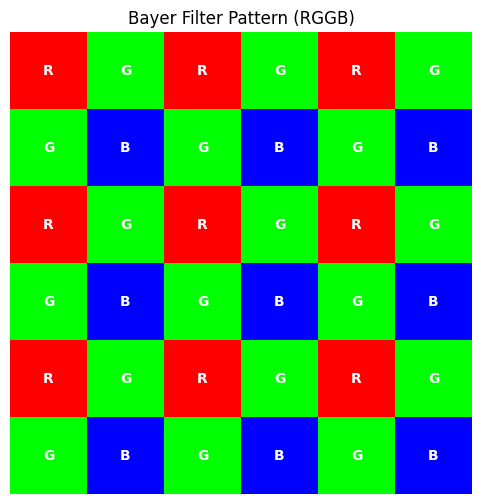

In [16]:
bayer = np.zeros((M, N), dtype=str)
bayer_visual = np.zeros((M, N, 3), dtype=np.uint8)

for i in range(M):
    for j in range(N):
        if i % 2 == 0 and j % 2 == 0:
            bayer[i, j] = 'R'  # Red
            bayer_visual[i, j] = [255, 0, 0]  # Red in RGB
        elif i % 2 == 0 and j % 2 == 1:
            bayer[i, j] = 'G'  # Green
            bayer_visual[i, j] = [0, 255, 0]  # Green in RGB
        elif i % 2 == 1 and j % 2 == 0:
            bayer[i, j] = 'G'  # Green
            bayer_visual[i, j] = [0, 255, 0]  # Green in RGB
        else:
            bayer[i, j] = 'B'  # Blue
            bayer_visual[i, j] = [0, 0, 255]  # Blue in RGB

# Visualize the Bayer pattern
plt.figure(figsize=(6, 6))
plt.imshow(bayer_visual)
plt.title('Bayer Filter Pattern (RGGB)')
for i in range(M):
    for j in range(N):
        plt.text(j, i, bayer[i, j], ha='center', va='center', color='white', fontweight='bold')
plt.axis('off')
plt.show()

## Map the correct values (simulate camera sensor readings)

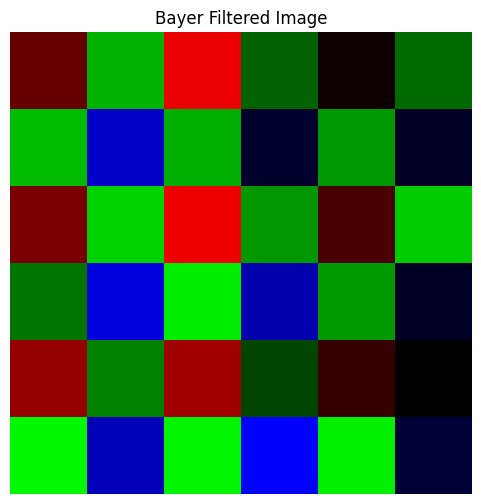

In [17]:
bayer_image = np.zeros((M, N, 3), dtype=np.uint8)
for i in range(M):
    for j in range(N):
        if bayer[i, j] == 'R':
            bayer_image[i, j, 0] = raw_image[i, j, 0]  # Only retain red channel
        elif bayer[i, j] == 'G':
            bayer_image[i, j, 1] = raw_image[i, j, 1]  # Only retain green channel
        else:  # 'B'
            bayer_image[i, j, 2] = raw_image[i, j, 2]  # Only retain blue channel

plt.figure(figsize=(6, 6))
plt.imshow(bayer_image)
plt.title('Bayer Filtered Image')
plt.axis('off')
plt.show()

## Interpolate the missing values (demosaicing)

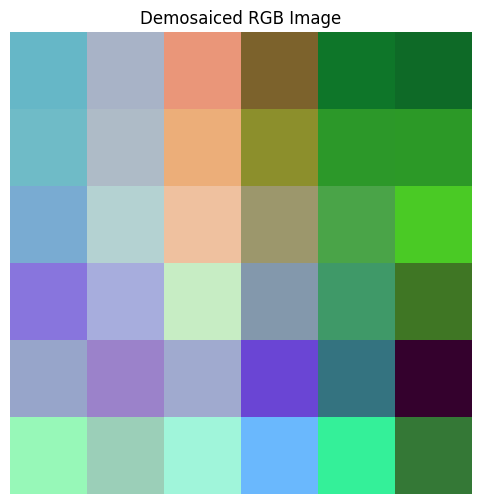

In [ ]:
rgb = bayer_image.astype(float)
height, width = rgb.shape[:2]

for i in range(height):
    for j in range(width):
        if i % 2 == 0 and j % 2 == 0: # Red pixel (i even, j even): interpolate green and blue
            
            # Green from top, bottom, left, right neighbors
            green_neighbors = []
            if i - 1 >= 0:
                green_neighbors.append(rgb[i - 1, j, 1])
            if i + 1 < height:
                green_neighbors.append(rgb[i + 1, j, 1])
            if j - 1 >= 0:
                green_neighbors.append(rgb[i, j - 1, 1])
            if j + 1 < width:
                green_neighbors.append(rgb[i, j + 1, 1])
            if green_neighbors:
                rgb[i, j, 1] = np.mean(green_neighbors)
            
            # Blue from diagonal neighbors
            blue_neighbors = []
            if i - 1 >= 0 and j - 1 >= 0:
                blue_neighbors.append(rgb[i - 1, j - 1, 2])
            if i - 1 >= 0 and j + 1 < width:
                blue_neighbors.append(rgb[i - 1, j + 1, 2])
            if i + 1 < height and j - 1 >= 0:
                blue_neighbors.append(rgb[i + 1, j - 1, 2])
            if i + 1 < height and j + 1 < width:
                blue_neighbors.append(rgb[i + 1, j + 1, 2])
            if blue_neighbors:
                rgb[i, j, 2] = np.mean(blue_neighbors)
        
        elif i % 2 == 1 and j % 2 == 1: # Blue pixel (i odd, j odd): interpolate green and red

            # Green from top, bottom, left, right neighbors
            green_neighbors = []
            if i - 1 >= 0:
                green_neighbors.append(rgb[i - 1, j, 1])
            if i + 1 < height:
                green_neighbors.append(rgb[i + 1, j, 1])
            if j - 1 >= 0:
                green_neighbors.append(rgb[i, j - 1, 1])
            if j + 1 < width:
                green_neighbors.append(rgb[i, j + 1, 1])
            if green_neighbors:
                rgb[i, j, 1] = np.mean(green_neighbors)
            
            # Red from diagonal neighbors
            red_neighbors = []
            if i - 1 >= 0 and j - 1 >= 0:
                red_neighbors.append(rgb[i - 1, j - 1, 0])
            if i - 1 >= 0 and j + 1 < width:
                red_neighbors.append(rgb[i - 1, j + 1, 0])
            if i + 1 < height and j - 1 >= 0:
                red_neighbors.append(rgb[i + 1, j - 1, 0])
            if i + 1 < height and j + 1 < width:
                red_neighbors.append(rgb[i + 1, j + 1, 0])
            if red_neighbors:
                rgb[i, j, 0] = np.mean(red_neighbors)
        
        elif i % 2 == 0 and j % 2 == 1: # Green pixel in even row (i even, j odd): interpolate red and blue

            # Red from left and right neighbors
            red_neighbors = []
            if j - 1 >= 0:
                red_neighbors.append(rgb[i, j - 1, 0])
            if j + 1 < width:
                red_neighbors.append(rgb[i, j + 1, 0])
            if red_neighbors:
                rgb[i, j, 0] = np.mean(red_neighbors)
            
            # Blue from top and bottom neighbors
            blue_neighbors = []
            if i - 1 >= 0:
                blue_neighbors.append(rgb[i - 1, j, 2])
            if i + 1 < height:
                blue_neighbors.append(rgb[i + 1, j, 2])
            if blue_neighbors:
                rgb[i, j, 2] = np.mean(blue_neighbors)
        
        elif i % 2 == 1 and j % 2 == 0: # Green pixel in odd row (i odd, j even): interpolate red and blue

            # Red from top and bottom neighbors
            red_neighbors = []
            if i - 1 >= 0:
                red_neighbors.append(rgb[i - 1, j, 0])
            if i + 1 < height:
                red_neighbors.append(rgb[i + 1, j, 0])
            if red_neighbors:
                rgb[i, j, 0] = np.mean(red_neighbors)
            
            # Blue from left and right neighbors
            blue_neighbors = []
            if j - 1 >= 0:
                blue_neighbors.append(rgb[i, j - 1, 2])
            if j + 1 < width:
                blue_neighbors.append(rgb[i, j + 1, 2])
            if blue_neighbors:
                rgb[i, j, 2] = np.mean(blue_neighbors)

# Convert back to uint8
demosaiced_image = rgb.clip(0, 255).astype(np.uint8)

plt.figure(figsize=(6, 6))
plt.imshow(demosaiced_image)
plt.title('Demosaiced RGB Image')
plt.axis('off')
plt.show()

## Transform to HSV color space

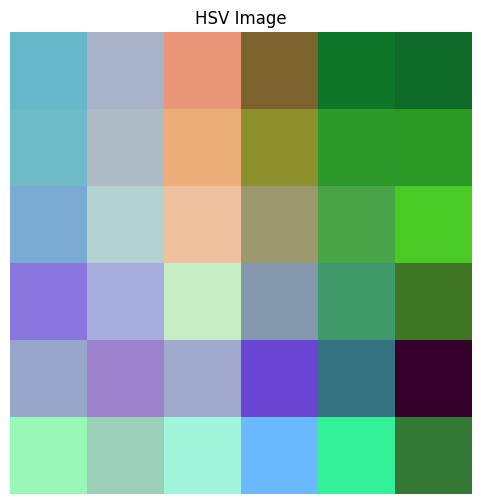

In [19]:
hsv_image = cv2.cvtColor(demosaiced_image, cv2.COLOR_RGB2HSV)

plt.figure(figsize=(6, 6))
plt.imshow(demosaiced_image, cmap="hsv")
plt.title('HSV Image')
plt.axis('off')
plt.show()

## Compare all images side by side

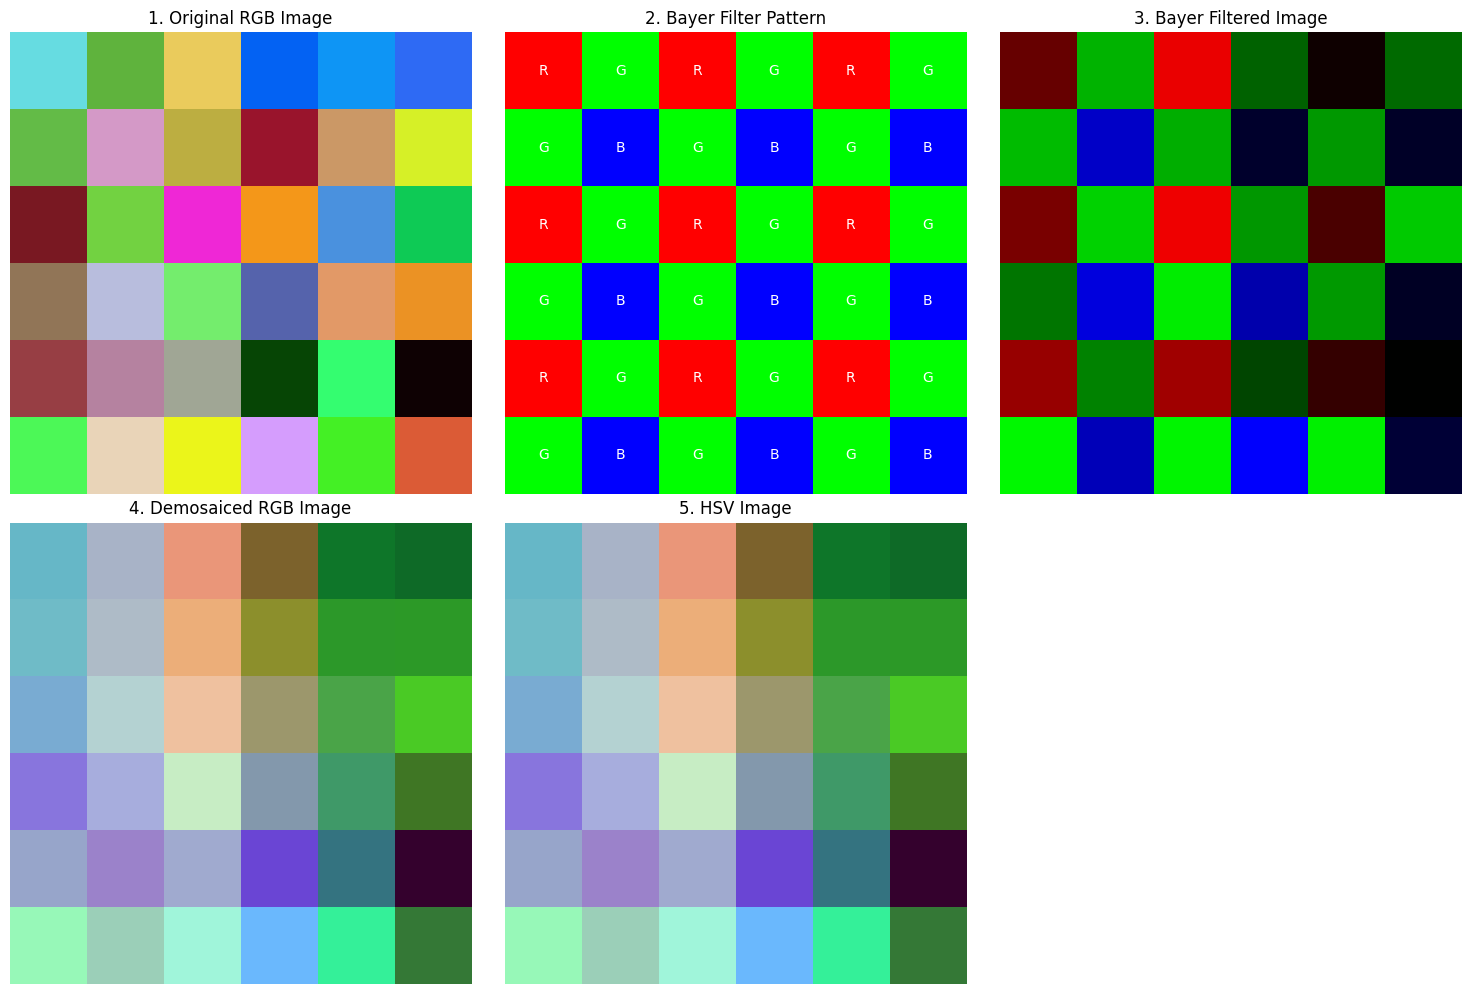

In [20]:
plt.figure(figsize=(15, 10))

plt.subplot(231)
plt.imshow(raw_image)
plt.title('1. Original RGB Image')
plt.axis('off')

plt.subplot(232)
plt.imshow(bayer_visual)
for i in range(M):
    for j in range(N):
        plt.text(j, i, bayer[i, j], ha='center', va='center', color='white')
plt.title('2. Bayer Filter Pattern')
plt.axis('off')

plt.subplot(233)
plt.imshow(bayer_image)
plt.title('3. Bayer Filtered Image')
plt.axis('off')

plt.subplot(234)
plt.imshow(demosaiced_image)
plt.title('4. Demosaiced RGB Image')
plt.axis('off')

plt.subplot(235)
plt.imshow(demosaiced_image, cmap="hsv")
plt.title('5. HSV Image')
plt.axis('off')

plt.tight_layout()
plt.show()

## Compare pixels values

In [21]:
print("Sample Data Comparison:")
print("-" * 50)
for i in range(M):
    for j in range(N):
        print(f"Position ({i},{j}):")
        print(f"  Raw RGB: {raw_image[i,j]}")
        print(f"  Bayer Filter: {bayer[i,j]}")
        print(f"  Filtered: {bayer_image[i,j]}")
        print(f"  Demosaiced: {demosaiced_image[i,j]}")
        print(f"  HSV: {hsv_image[i,j]}")
        print("-" * 30)

Sample Data Comparison:
--------------------------------------------------
Position (0,0):
  Raw RGB: [102 220 225]
  Bayer Filter: R
  Filtered: [102   0   0]
  Demosaiced: [102 183 199]
  HSV: [ 95 124 199]
------------------------------
Position (0,1):
  Raw RGB: [ 95 179  61]
  Bayer Filter: G
  Filtered: [  0 179   0]
  Demosaiced: [168 179 199]
  HSV: [109  40 199]
------------------------------
Position (0,2):
  Raw RGB: [234 203  92]
  Bayer Filter: R
  Filtered: [234   0   0]
  Demosaiced: [234 150 121]
  HSV: [  8 123 234]
------------------------------
Position (0,3):
  Raw RGB: [  3  98 243]
  Bayer Filter: G
  Filtered: [ 0 98  0]
  Demosaiced: [124  98  44]
  HSV: [ 20 165 124]
------------------------------
Position (0,4):
  Raw RGB: [ 14 149 245]
  Bayer Filter: R
  Filtered: [14  0  0]
  Demosaiced: [ 14 118  41]
  HSV: [ 68 225 118]
------------------------------
Position (0,5):
  Raw RGB: [ 46 106 244]
  Bayer Filter: G
  Filtered: [  0 106   0]
  Demosaiced: [ 14 10

# Real Image Example

### Showing the raw image

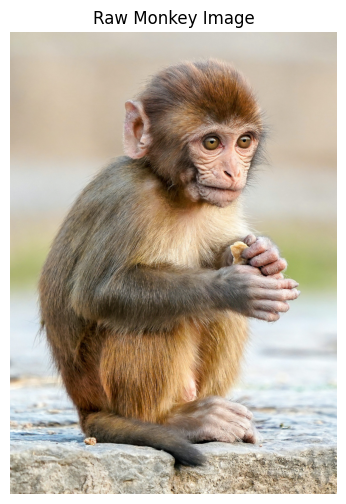

In [22]:
rawMonkeyImage = cv2.imread("monkey.jpg", cv2.IMREAD_COLOR_RGB)

plt.figure(figsize=(6, 6))
plt.imshow(rawMonkeyImage)
plt.title('Raw Monkey Image')
plt.axis('off')
plt.show()



### Applying bayer filter

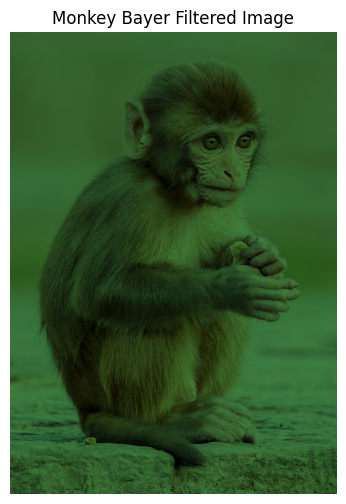

In [23]:
height, width = rawMonkeyImage.shape[:2]
bayerMonkey = np.zeros((height, width), dtype=str)
bayerMonkeyImage = np.zeros((height, width, 3), dtype=np.uint8)

for i in range(height):
    for j in range(width):
        if i % 2 == 0 and j % 2 == 0:
            bayerMonkey[i, j] = 'R'  # Red
        elif i % 2 == 0 and j % 2 == 1:
            bayerMonkey[i, j] = 'G'  # Green
        elif i % 2 == 1 and j % 2 == 0:
            bayerMonkey[i, j] = 'G'  # Green
        else:
            bayerMonkey[i, j] = 'B'  # Blue


for i in range(height):
    for j in range(width):
        if bayerMonkey[i, j] == 'R':
            bayerMonkeyImage[i, j, 0] = rawMonkeyImage[i, j, 0]  # Only retain red channel
        elif bayerMonkey[i, j] == 'G':
            bayerMonkeyImage[i, j, 1] = rawMonkeyImage[i, j, 1]  # Only retain green channel
        else:  # 'B'
            bayerMonkeyImage[i, j, 2] = rawMonkeyImage[i, j, 2]  # Only retain blue channel

plt.figure(figsize=(6, 6))
plt.imshow(bayerMonkeyImage)
plt.title('Monkey Bayer Filtered Image')
plt.axis('off')
plt.show()

### Interpolate missing values (Demosaicing)

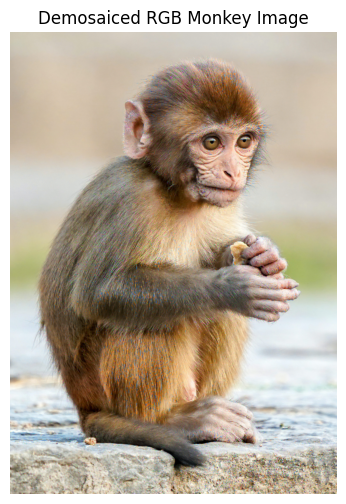

In [24]:
rgb = bayerMonkeyImage.astype(float)
height, width = rgb.shape[:2]

for i in range(height):
    for j in range(width):
        if i % 2 == 0 and j % 2 == 0:
            # Red pixel (i even, j even): interpolate green and blue
            # Green from top, bottom, left, right neighbors
            green_neighbors = []
            if i - 1 >= 0:
                green_neighbors.append(rgb[i - 1, j, 1])
            if i + 1 < height:
                green_neighbors.append(rgb[i + 1, j, 1])
            if j - 1 >= 0:
                green_neighbors.append(rgb[i, j - 1, 1])
            if j + 1 < width:
                green_neighbors.append(rgb[i, j + 1, 1])
            if green_neighbors:
                rgb[i, j, 1] = np.mean(green_neighbors)
            
            # Blue from diagonal neighbors
            blue_neighbors = []
            if i - 1 >= 0 and j - 1 >= 0:
                blue_neighbors.append(rgb[i - 1, j - 1, 2])
            if i - 1 >= 0 and j + 1 < width:
                blue_neighbors.append(rgb[i - 1, j + 1, 2])
            if i + 1 < height and j - 1 >= 0:
                blue_neighbors.append(rgb[i + 1, j - 1, 2])
            if i + 1 < height and j + 1 < width:
                blue_neighbors.append(rgb[i + 1, j + 1, 2])
            if blue_neighbors:
                rgb[i, j, 2] = np.mean(blue_neighbors)
        
        elif i % 2 == 1 and j % 2 == 1:
            # Blue pixel (i odd, j odd): interpolate green and red
            # Green from top, bottom, left, right neighbors
            green_neighbors = []
            if i - 1 >= 0:
                green_neighbors.append(rgb[i - 1, j, 1])
            if i + 1 < height:
                green_neighbors.append(rgb[i + 1, j, 1])
            if j - 1 >= 0:
                green_neighbors.append(rgb[i, j - 1, 1])
            if j + 1 < width:
                green_neighbors.append(rgb[i, j + 1, 1])
            if green_neighbors:
                rgb[i, j, 1] = np.mean(green_neighbors)
            
            # Red from diagonal neighbors
            red_neighbors = []
            if i - 1 >= 0 and j - 1 >= 0:
                red_neighbors.append(rgb[i - 1, j - 1, 0])
            if i - 1 >= 0 and j + 1 < width:
                red_neighbors.append(rgb[i - 1, j + 1, 0])
            if i + 1 < height and j - 1 >= 0:
                red_neighbors.append(rgb[i + 1, j - 1, 0])
            if i + 1 < height and j + 1 < width:
                red_neighbors.append(rgb[i + 1, j + 1, 0])
            if red_neighbors:
                rgb[i, j, 0] = np.mean(red_neighbors)
        
        elif i % 2 == 0 and j % 2 == 1:
            # Green pixel in even row (i even, j odd): interpolate red and blue
            # Red from left and right neighbors
            red_neighbors = []
            if j - 1 >= 0:
                red_neighbors.append(rgb[i, j - 1, 0])
            if j + 1 < width:
                red_neighbors.append(rgb[i, j + 1, 0])
            if red_neighbors:
                rgb[i, j, 0] = np.mean(red_neighbors)
            
            # Blue from top and bottom neighbors
            blue_neighbors = []
            if i - 1 >= 0:
                blue_neighbors.append(rgb[i - 1, j, 2])
            if i + 1 < height:
                blue_neighbors.append(rgb[i + 1, j, 2])
            if blue_neighbors:
                rgb[i, j, 2] = np.mean(blue_neighbors)
        
        elif i % 2 == 1 and j % 2 == 0:
            # Green pixel in odd row (i odd, j even): interpolate red and blue
            # Red from top and bottom neighbors
            red_neighbors = []
            if i - 1 >= 0:
                red_neighbors.append(rgb[i - 1, j, 0])
            if i + 1 < height:
                red_neighbors.append(rgb[i + 1, j, 0])
            if red_neighbors:
                rgb[i, j, 0] = np.mean(red_neighbors)
            
            # Blue from left and right neighbors
            blue_neighbors = []
            if j - 1 >= 0:
                blue_neighbors.append(rgb[i, j - 1, 2])
            if j + 1 < width:
                blue_neighbors.append(rgb[i, j + 1, 2])
            if blue_neighbors:
                rgb[i, j, 2] = np.mean(blue_neighbors)

# Convert back to uint8
demosaicedMonkeyImage = rgb.clip(0, 255).astype(np.uint8)

plt.figure(figsize=(6, 6))
plt.imshow(demosaicedMonkeyImage)
plt.title('Demosaiced RGB Monkey Image')
plt.axis('off')
plt.show()

### HSV monkey image

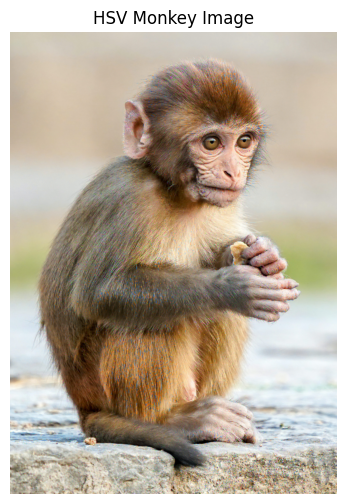

In [25]:
hsvMonkeyImage = cv2.cvtColor(demosaiced_image, cv2.COLOR_RGB2HSV)

plt.figure(figsize=(6, 6))
plt.imshow(demosaicedMonkeyImage, cmap="hsv")
plt.title('HSV Monkey Image')
plt.axis('off')
plt.show()

### Compare all monkey images

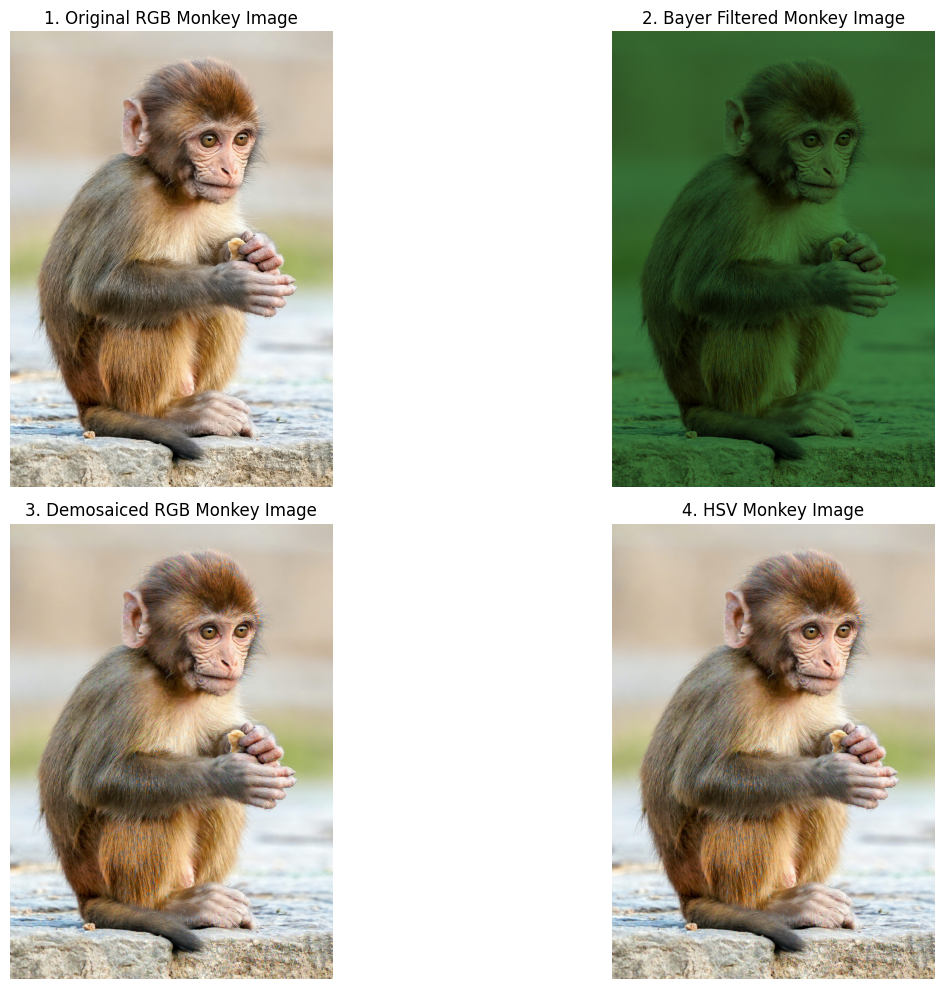

In [26]:
plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.imshow(rawMonkeyImage)
plt.title('1. Original RGB Monkey Image')
plt.axis('off')

plt.subplot(222)
plt.imshow(bayerMonkeyImage)
plt.title('2. Bayer Filtered Monkey Image')
plt.axis('off')

plt.subplot(223)
plt.imshow(demosaicedMonkeyImage)
plt.title('3. Demosaiced RGB Monkey Image')
plt.axis('off')

plt.subplot(224)
plt.imshow(demosaicedMonkeyImage, cmap="hsv")
plt.title('4. HSV Monkey Image')
plt.axis('off')

plt.tight_layout()
plt.show()

### Pixels values comparison

In [27]:
# Sample data for comparison
print("Sample Data Comparison:")
print("-" * 50)
for i in range(6):
    for j in range(6):
        print(f"Position ({i},{j}):")
        print(f"  Raw Monkey RGB: {rawMonkeyImage[i,j]}")
        print(f"  Bayer Monkey Filter: {bayerMonkey[i,j]}")
        print(f"  Filtered Monkey: {bayerMonkeyImage[i,j]}")
        print(f"  Demosaiced Monkey: {demosaicedMonkeyImage[i,j]}")
        print(f"  HSV Monkey: {hsvMonkeyImage[i,j]}")
        print("-" * 30)

Sample Data Comparison:
--------------------------------------------------
Position (0,0):
  Raw Monkey RGB: [205 200 180]
  Bayer Monkey Filter: R
  Filtered Monkey: [205   0   0]
  Demosaiced Monkey: [205 200 180]
  HSV Monkey: [ 95 124 199]
------------------------------
Position (0,1):
  Raw Monkey RGB: [205 200 180]
  Bayer Monkey Filter: G
  Filtered Monkey: [  0 200   0]
  Demosaiced Monkey: [205 200 180]
  HSV Monkey: [109  40 199]
------------------------------
Position (0,2):
  Raw Monkey RGB: [205 200 180]
  Bayer Monkey Filter: R
  Filtered Monkey: [205   0   0]
  Demosaiced Monkey: [205 199 179]
  HSV Monkey: [  8 123 234]
------------------------------
Position (0,3):
  Raw Monkey RGB: [204 199 179]
  Bayer Monkey Filter: G
  Filtered Monkey: [  0 199   0]
  Demosaiced Monkey: [204 199 179]
  HSV Monkey: [ 20 165 124]
------------------------------
Position (0,4):
  Raw Monkey RGB: [204 199 179]
  Bayer Monkey Filter: R
  Filtered Monkey: [204   0   0]
  Demosaiced Monkey